In [29]:
# import dataset
import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
data = pd.read_csv(url, header=None)

In [28]:
# printing data shape
data.shape

(306, 4)

                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


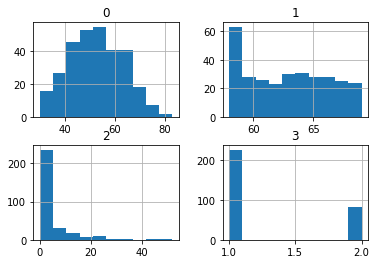

In [36]:
# understanding the data
from matplotlib import pyplot as plt
print(data.describe())
data.hist()
plt.show()

In [98]:
# data preprocessing
from sklearn.preprocessing import LabelEncoder
X = data[[0,1,2]]
y = data[3]
X = X.astype('float64')
y = y.astype('float64')
y = LabelEncoder().fit_transform(y)

In [192]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [100]:
# building the model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [198]:
model = Sequential()
model.add(Dense(10, input_shape=(3,), activation="relu", kernel_initializer='he_normal'))
#model.add(Dense(4, activation="relu", kernel_initializer="he_normal"))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='adam', loss='binary_crossentropy')

In [199]:
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                40        
                                                                 
 dense_39 (Dense)            (None, 2)                 22        
                                                                 
Total params: 62
Trainable params: 62
Non-trainable params: 0
_________________________________________________________________


In [212]:
model.fit(X_train, y_train, epochs=200, batch_size=10)

ValueError: Data cardinality is ambiguous:
  x sizes: 214
  y sizes: 107
Make sure all arrays contain the same number of samples.

In [210]:
y_train = y_train.reshape(-1,2)

In [215]:
y_train.shape

(107, 2)

In [216]:
data[3]

0      1
1      1
2      1
3      1
4      1
      ..
301    1
302    1
303    1
304    2
305    2
Name: 3, Length: 306, dtype: int64